## Importing and prepping data

In [1]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca

In [2]:
features = []
remote_folder = 'Tissue_Studies/09_11_18_Regional'
bucket = 'ccurtis.data'

vids = 15
types = ['PEG', 'PS']
pups = [2, 3]
slices = [1, 2, 3]
counter = 0
for typ in types:
    for pup in pups:
        for slic in slices:
            for num in range(1, vids+1):
                try:
                    #to_track.append('100x_0_4_1_2_gel_{}_bulk_vid_{}'.format(vis, num))
                    #to_track.append('{}_P{}_S{}_XY{}'.format(typ, pup, slic, '%02d' % num))
                    filename = 'features_{}_P{}_S{}_XY{}.csv'.format(typ, pup, slic, '%02d' % num)
                    aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
                    fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
                    fstats['Particle Type'] = pd.Series(fstats.shape[0]*[typ], index=fstats.index)
                    fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
                    fstats['Slices'] = pd.Series(fstats.shape[0]*[str(slic)], index=fstats.index)
                    fstats['Pup'] = pd.Series(fstats.shape[0]*[str(pup)], index=fstats.index)
                    if num in range(1, 6):
                        fstats['Region'] = pd.Series(fstats.shape[0]*['Cortex'], index=fstats.index)
                        fstats['Region and Type'] = pd.Series(fstats.shape[0]*['{}_Cortex'.format(typ)], index=fstats.index)
                    elif num in range(6, 11):
                        fstats['Region'] = pd.Series(fstats.shape[0]*['Hippocampus'], index=fstats.index)
                        fstats['Region and Type'] = pd.Series(fstats.shape[0]*['{}_Hippocampus'.format(typ)], index=fstats.index)
                    else:
                        fstats['Region'] = pd.Series(fstats.shape[0]*['Thalamus'], index=fstats.index)
                        fstats['Region and Type'] = pd.Series(fstats.shape[0]*['{}_Thalamus'.format(typ)], index=fstats.index)
                    #print(num)
                    print(filename)
                    counter = counter + 1
                    if counter == 1:
                        fstats_tot = fstats
                    else:
                        fstats_tot = fstats_tot.append(fstats, ignore_index=True)
                except:
                    print('skipped filename: {}'.format(filename))

features_PEG_P2_S1_XY01.csv
features_PEG_P2_S1_XY02.csv
features_PEG_P2_S1_XY03.csv
features_PEG_P2_S1_XY04.csv
features_PEG_P2_S1_XY05.csv
features_PEG_P2_S1_XY06.csv
features_PEG_P2_S1_XY07.csv
features_PEG_P2_S1_XY08.csv
features_PEG_P2_S1_XY09.csv
features_PEG_P2_S1_XY10.csv
features_PEG_P2_S1_XY11.csv
features_PEG_P2_S1_XY12.csv
features_PEG_P2_S1_XY13.csv
features_PEG_P2_S1_XY14.csv
features_PEG_P2_S1_XY15.csv
features_PEG_P2_S2_XY01.csv
features_PEG_P2_S2_XY02.csv
features_PEG_P2_S2_XY03.csv
features_PEG_P2_S2_XY04.csv
features_PEG_P2_S2_XY05.csv
features_PEG_P2_S2_XY06.csv
features_PEG_P2_S2_XY07.csv
features_PEG_P2_S2_XY08.csv
features_PEG_P2_S2_XY09.csv
features_PEG_P2_S2_XY10.csv
features_PEG_P2_S2_XY11.csv
skipped filename: features_PEG_P2_S2_XY12.csv
skipped filename: features_PEG_P2_S2_XY13.csv
features_PEG_P2_S2_XY14.csv
features_PEG_P2_S2_XY15.csv
features_PEG_P2_S3_XY01.csv
features_PEG_P2_S3_XY02.csv
features_PEG_P2_S3_XY03.csv
features_PEG_P2_S3_XY04.csv
features_PEG

In [ ]:
fstats_tot.to_csv('features.csv')

In [3]:
#with equal sample sizes for each particle type
import random
counter = 0
#mws = ['10k_PEG', '5k_PEG', '1k_PEG', 'PS_COOH']
mws = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
for mw in mws:
    fstats_type = fstats_tot[fstats_tot['Region and Type']==mw].reset_index(drop=True)
    print(fstats_type.shape)
    subset = np.sort(np.array(random.sample(range(fstats_type.shape[0]), 34000)))
    if counter == 0:
        fstats_sub = fstats_type.loc[subset, :].reset_index(drop=True)
    else:
        fstats_sub = fstats_sub.append(fstats_type.loc[subset, :].reset_index(drop=True), ignore_index=True)
    counter = counter + 1

(86139, 73)
(34136, 73)
(59388, 73)
(174928, 73)
(155972, 73)
(53595, 73)


In [4]:
#fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
nonnum = ['Particle Type', 'Video Number', 'Track_ID', 'Slices', 'Pup', 'Region', 'Region and Type']
fstats_num = fstats_sub.drop(nonnum, axis=1)
fstats_raw = fstats_num.values
#fstats

In [6]:
mws = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
for mw in mws:
    print(fstats_tot[fstats_tot['Region and Type'] == mw].shape)

(86139, 73)
(34136, 73)
(59388, 73)
(174928, 73)
(155972, 73)
(53595, 73)


## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [5]:
pcadataset = pca.pca_analysis(fstats_tot, dropcols=nonnum, n_components=16)

Cumulative explained variance:
0 component: 0.234867217949884
1 component: 0.3465268489275413
2 component: 0.426160535524323
3 component: 0.4823672446113929
4 component: 0.5287002923825246
5 component: 0.5684210326753392
6 component: 0.6031121193378959
7 component: 0.6367095631071172
8 component: 0.6663170137846233
9 component: 0.6922443113827598
10 component: 0.7168045982884614
11 component: 0.7382819191703898
12 component: 0.7582004989358593
13 component: 0.7770816740303466
14 component: 0.7930463016072477
15 component: 0.808455376580407


The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [6]:
fstats_tot.shape

(564158, 73)

In [11]:
for test in fstats_tot.columns:
    print(test)

Track_ID
alpha
D_fit
kurtosis
asymmetry1
asymmetry2
asymmetry3
AR
elongation
boundedness
fractal_dim
trappedness
efficiency
straightness
MSD_ratio
frames
X
Y
Quality
Mean_Intensity
SN_Ratio
Deff1
Deff2
Mean alpha
Std alpha
Mean D_fit
Std D_fit
Mean kurtosis
Std kurtosis
Mean asymmetry1
Std asymmetry1
Mean asymmetry2
Std asymmetry2
Mean asymmetry3
Std asymmetry3
Mean AR
Std AR
Mean elongation
Std elongation
Mean boundedness
Std boundedness
Mean fractal_dim
Std fractal_dim
Mean trappedness
Std trappedness
Mean efficiency
Std efficiency
Mean straightness
Std straightness
Mean MSD_ratio
Std MSD_ratio
Mean frames
Std frames
Mean X
Std X
Mean Y
Std Y
Mean Quality
Std Quality
Mean Mean_Intensity
Std Mean_Intensity
Mean SN_Ratio
Std SN_Ratio
Mean Deff1
Std Deff1
Mean Deff2
Std Deff2
Particle Type
Video Number
Slices
Pup
Region
Region and Type


In [ ]:
kmostat = pca.kmo(pcadataset.scaled)

## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [46]:
import numpy as np
ncomp = 16
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PEG_Cortex'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PEG_Hippocampus'].values[:, -ncomp:], axis=0)
dicti[2] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PEG_Thalamus'].values[:, -ncomp:], axis=0)
dicti[3] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PS_Cortex'].values[:, -ncomp:], axis=0)
dicti[4] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PS_Hippocampus'].values[:, -ncomp:], axis=0)
dicti[5] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PS_Thalamus'].values[:, -ncomp:], axis=0)

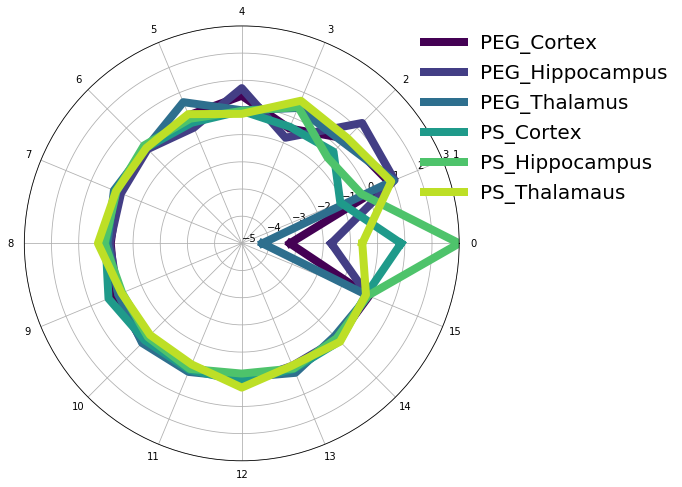

In [49]:
pca.plot_pca(dicti, savefig=True, labels=['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus',
                                          'PS_Thalamaus'], rticks=np.linspace(-5, 3, 9))

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

In [13]:
pcadataset.prcomps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Mean Quality,Mean asymmetry2,Std asymmetry1,Mean X,Mean kurtosis,fractal_dim,Mean MSD_ratio,frames,efficiency,Mean Y,elongation,Std D_fit,Mean elongation,kurtosis,Mean asymmetry3,Mean asymmetry3
1,Std trappedness,Mean asymmetry1,Std kurtosis,X,Mean asymmetry1,elongation,MSD_ratio,Mean frames,trappedness,Quality,fractal_dim,Mean D_fit,Mean fractal_dim,D_fit,SN_Ratio,SN_Ratio
2,Std fractal_dim,Std asymmetry3,Mean AR,Std X,Std kurtosis,Std AR,Mean asymmetry3,Mean Y,alpha,D_fit,Mean elongation,Mean Y,Deff1,SN_Ratio,kurtosis,kurtosis
3,Std elongation,Mean kurtosis,Std asymmetry2,fractal_dim,efficiency,Std boundedness,Mean Y,Quality,D_fit,Std D_fit,Mean fractal_dim,Quality,straightness,boundedness,straightness,Mean_Intensity
4,Mean alpha,asymmetry3,Std MSD_ratio,elongation,Std asymmetry1,Mean Mean_Intensity,Quality,Std Y,asymmetry2,Std Y,Quality,Std asymmetry2,Deff2,straightness,Mean_Intensity,straightness


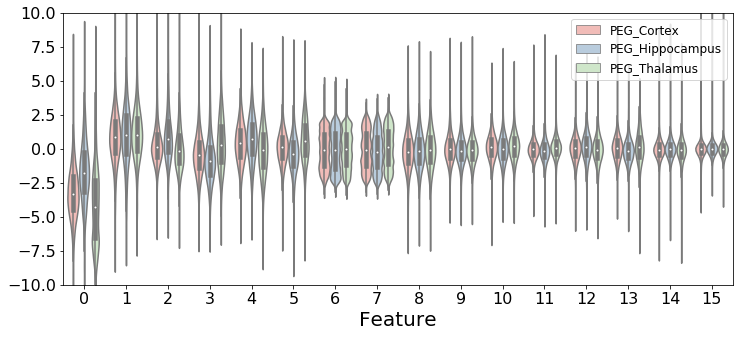

In [14]:
lvals = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus']
feats = pca.feature_violin(pcadataset.final, label='Region and Type', lvals=lvals, fsubset=16, yrange=[-10, 10])

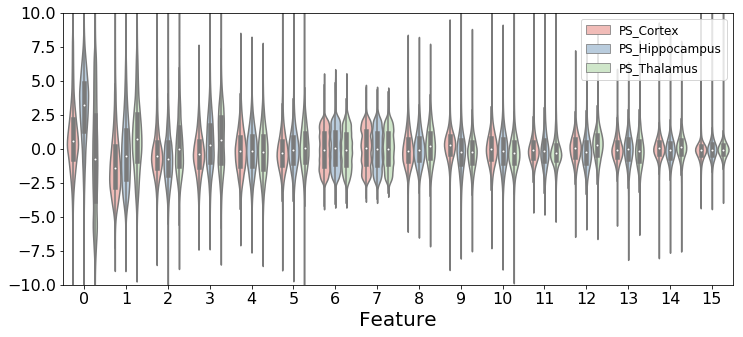

In [15]:
lvals = ['PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
feats = pca.feature_violin(pcadataset.final, label='Region and Type', lvals=lvals, fsubset=16, yrange=[-10, 10])

In [ ]:
lvals = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
#lvals = ['PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
fstats1 = pca.feature_plot_2D(pcadataset.final,
                              label='Region and Type', lvals=lvals, randcount=300, yrange=[-6, 6],
                              xrange=[-4, 4])

In [ ]:
lvals = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
#lvals = ['PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
fstats1 = pca.feature_plot_3D(pcadataset.final,
                              label='Region and Type', lvals=lvals, randcount=300, yrange=[-6, 6],
                              xrange=[-4, 4], alpha=0.45)

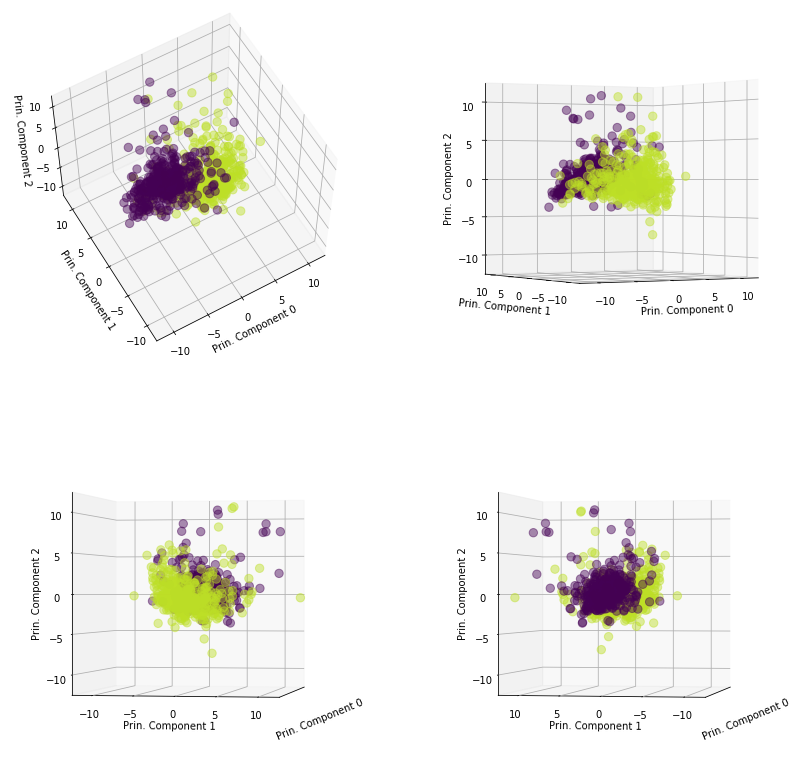

In [16]:
xr = 12
lvals = ['PEG', 'PS']
#lvals = ['PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
fstats1 = pca.feature_plot_3D(pcadataset.final,
                              label='Particle Type', lvals=lvals, randcount=400, ylim=[-xr, xr],
                              xlim=[-xr, xr], zlim=[-xr, xr], alpha=0.45)

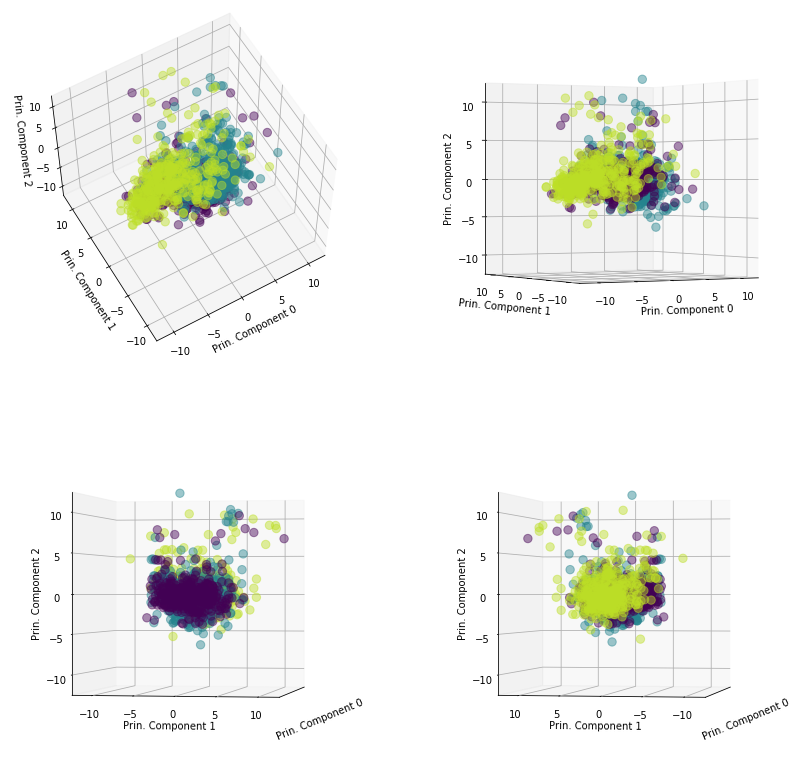

In [17]:
lvals = ['Cortex', 'Hippocampus', 'Thalamus']
#lvals = ['PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
fstats1 = pca.feature_plot_3D(pcadataset.final,
                              label='Region', lvals=lvals, randcount=400, ylim=[-xr, xr],
                              xlim=[-xr, xr], zlim=[-xr, xr], alpha=0.45)

In [26]:
ncomp = 16
trainp = np.array([])
testp = np.array([])
lvals = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcadataset.final, 'Region and Type', lvals, equal_sampling=True,
                                       tsize=800, input_cols=ncomp, model='MLP', NNhidden_layer=(8, 6))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Region and Type'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    
    print('Run {}: {}'.format(i, testp[i]))

Run 0: 0.563546027885805
Run 1: 0.5664335168516621
Run 2: 0.5551334909723872
Run 3: 0.564659191219481
Run 4: 0.5650296548130134
Run 5: 0.5627058377263107
Run 6: 0.5675750410346038
Run 7: 0.5536480914920997
Run 8: 0.5639359895632075
Run 9: 0.5437537002045526
Run 10: 0.5679525948404525
Run 11: 0.5708152680632022
Run 12: 0.5685109490603696
Run 13: 0.5710297469857735
Run 14: 0.5678834652703675
Run 15: 0.564588289096317
Run 16: 0.5556599392368804
Run 17: 0.565476338188947
Run 18: 0.5517461420382234
Run 19: 0.5582390039669738


In [27]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.5522812500000001 +/ 0.009826506060353636
0.5624161139255314 +/ 0.006963996725933248


In [30]:
#ncomp = 8
trainp = np.array([])
testp = np.array([])
lvals = ['PEG', 'PS']

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcadataset.final, 'Particle Type', lvals, equal_sampling=True,
                                       tsize=800, input_cols=ncomp, model='MLP', NNhidden_layer=(8, 6))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Particle Type'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    
    print('Run {}: {}'.format(i, testp[i]))

Run 0: 0.8663069565618142
Run 1: 0.8589756770266486
Run 2: 0.8679004817799268
Run 3: 0.8629727842200234
Run 4: 0.8760843593461406
Run 5: 0.8751874474881151
Run 6: 0.8781529287894526
Run 7: 0.8650998479149458
Run 8: 0.8689445155435179
Run 9: 0.8614093924042555
Run 10: 0.8739253896957945
Run 11: 0.8696623995405542
Run 12: 0.8696872152836617
Run 13: 0.864825102187685
Run 14: 0.8539717596843438
Run 15: 0.8690260529851567
Run 16: 0.864112535849886
Run 17: 0.8594064074248703
Run 18: 0.8648853689923744
Run 19: 0.8619961074734382


In [31]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.9474062499999997 +/ 0.012254264245049567
0.8666266365096302 +/ 0.0060334776424571575


In [32]:
#ncomp = 8
trainp = np.array([])
testp = np.array([])
lvals = ['Cortex', 'Hippocampus', 'Thalamus']

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcadataset.final, 'Region', lvals, equal_sampling=True,
                                       tsize=800, input_cols=ncomp, model='MLP', NNhidden_layer=(8, 6))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Region'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    
    print('Run {}: {}'.format(i, testp[i]))

Run 0: 0.6014378950577675
Run 1: 0.6007873680777371
Run 2: 0.5993835060390883
Run 3: 0.5928002439033037
Run 4: 0.5422204417911294
Run 5: 0.5412544003630189
Run 6: 0.5816420222703569
Run 7: 0.5869082774683688
Run 8: 0.6092938503043474
Run 9: 0.5548481099266518
Run 10: 0.6003974064003347
Run 11: 0.5944239025237611
Run 12: 0.584704993991045
Run 13: 0.6031200479298353
Run 14: 0.5822854590380709
Run 15: 0.6039070614969565
Run 16: 0.5839286157423984
Run 17: 0.5706823265822695
Run 18: 0.5622485190319024
Run 19: 0.5804987255343361


In [33]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.66525 +/ 0.013236890789674815
0.5838386586736339 +/ 0.019724866735743515


In [53]:
#ncomp = 8
trainp = np.array([])
testp = np.array([])
lvals = ['Cortex', 'Hippocampus', 'Thalamus']

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcadataset.final,
                                       'Region', lvals, equal_sampling=True,
                                       tsize=900, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 2))

    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final[pcadataset.final['Particle Type']=='PEG'].values[:, -ncomp:]
    y2 = pcadataset.final[pcadataset.final['Particle Type']=='PEG']['Region'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

Run 0: 0.49440341083027667
Run 1: 0.4973867741271158
Run 2: 0.5082682577937583
Run 3: 0.5019731385983759
Run 4: 0.5063758258517336
Run 5: 0.513967817525033
Run 6: 0.5021957776503788
Run 7: 0.4785125484935685
Run 8: 0.49694149602310994
Run 9: 0.509999276423081
Run 10: 0.4974479998664166
Run 11: 0.48316570468042946
Run 12: 0.472824120714894
Run 13: 0.4920935306657464
Run 14: 0.4792695212703784
Run 15: 0.4982828963114275
Run 16: 0.5181367337737876
Run 17: 0.49312880225756
Run 18: 0.4825645792400216
Run 19: 0.48343843751913307


In [54]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.6440925925925927 +/ 0.00659994907907363
0.49551883248081136 +/ 0.012244377757823376


In [55]:
#ncomp = 8
trainp = np.array([])
testp = np.array([])
lvals = ['Cortex', 'Hippocampus', 'Thalamus']

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcadataset.final,
                                       'Region', lvals, equal_sampling=True,
                                       tsize=900, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 2))

    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final[pcadataset.final['Particle Type']=='PS'].values[:, -ncomp:]
    y2 = pcadataset.final[pcadataset.final['Particle Type']=='PS']['Region'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

Run 0: 0.6732363229690893
Run 1: 0.6477197362774548
Run 2: 0.6650879725354035
Run 3: 0.662401331616796
Run 4: 0.6510669839659814
Run 5: 0.6582790413399394
Run 6: 0.6634520604949349
Run 7: 0.6590696888125983
Run 8: 0.6517171874796811
Run 9: 0.6625625820881936
Run 10: 0.6579279314425415
Run 11: 0.651394686536886
Run 12: 0.6550826408665913
Run 13: 0.6579045241160483
Run 14: 0.6609058635352866
Run 15: 0.6599903769879972
Run 16: 0.6580943835420486
Run 17: 0.6607758228325465
Run 18: 0.6670463855186674
Run 19: 0.6671764262214073


In [56]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.647574074074074 +/ 0.012207890025519221
0.6595445974590046 +/ 0.006071855412355919
